In [79]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np


## Load Penguins dataset

In [80]:
penguins = sns.load_dataset('penguins')

feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins.dropna(subset=feature_names, inplace=True)

species_names = penguins['species'].unique()

# Define data and targets
X = penguins[feature_names]

y = penguins.species

X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [81]:
# Split data in training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (273, 4)
test size: (69, 4)


## Generate a decision tree estimator for comparison

In [101]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

clf.predict(X_test)

print(clf.score(X_test, y_test))

0.9420289855072463


In [138]:
from sklearn.inspection import DecisionBoundaryDisplay
f1 = feature_names[0]
f2 = feature_names[3]


clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=1, random_state=5)
clf.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette="husl")
plt.show()

## Using Random Forest for classification 

We'll now take a look how we can use ensemble methods to perform a classification task such as identifying penguin species! We're going to use a Random forest classifier available in scikit-learn. Random forests are built on decision trees and can provide another way to address over-fitting. Rather than classifying based on one single decision tree (which could overfit the data), an average of results of many trees can be derived for more robust/accurate estimates compared against single trees used in the ensemble. 

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

clf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1) #extra parameter called n_estimators which is number of trees in the forest

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [104]:
clf.score(X_test, y_test)

0.9855072463768116

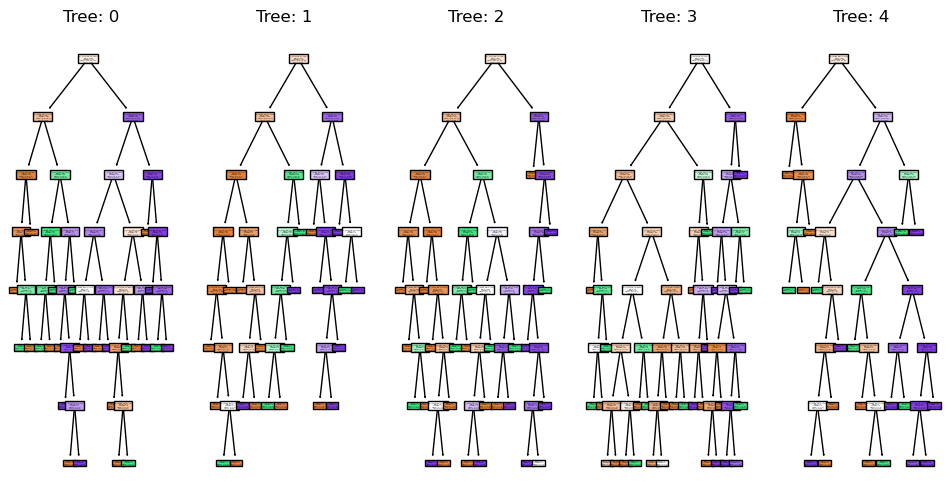

In [137]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5 ,figsize=(12,6))

# plot first 5 trees in forest
for index in range(0, 5):
    plot_tree(clf.estimators_[index], 
        class_names=species_names,
        feature_names=feature_names, 
        filled=True, 
        ax=axes[index])

    axes[index].set_title(f'Tree: {index}')
    
plt.show()

## Potential questions
* What does the parameter n_estimators control?



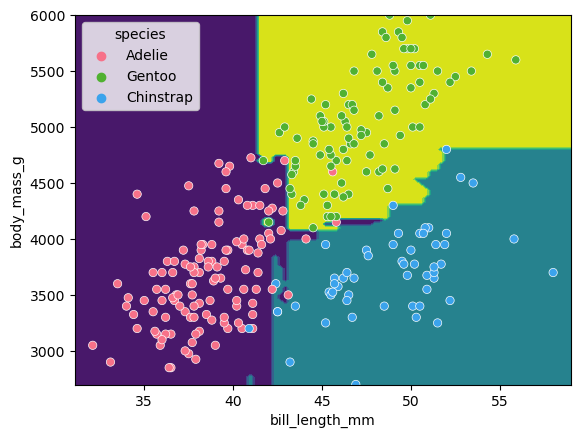

<Figure size 640x480 with 0 Axes>

In [139]:
# plot classification space for body mass and bill length with random forest
clf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1, random_state=5)
clf.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, X_train[[f1, f2]])

fig = sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette="husl")
plt.show()

## Random forests for regression problems (continuous data) ***MAYBE INLCUDE THIS?***

Ensemble methods can also be useful for continuous data to perform regression problems. We'll take a look at how random forests can be utilised with scikit-learn when working with continuous data. 

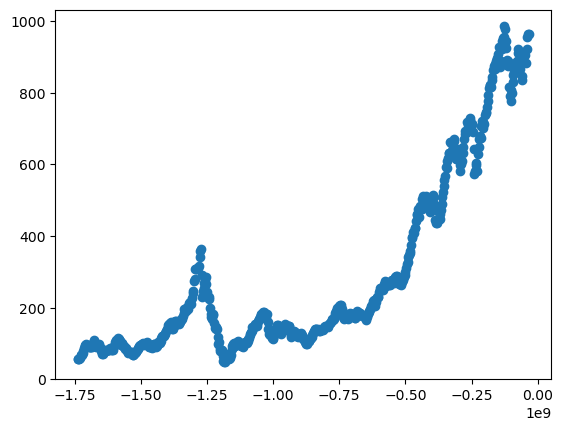

In [26]:
stock = sns.load_dataset('dowjones')

# convert date to unix time  
stock['date_int'] = stock.Date.apply(lambda x: x.timestamp())

# define X and y 
X = stock.date_int.to_numpy()
y = stock.Price.to_numpy()

# define X as a 2d array
X = X[:,None]

plt.plot(X, y, 'o')

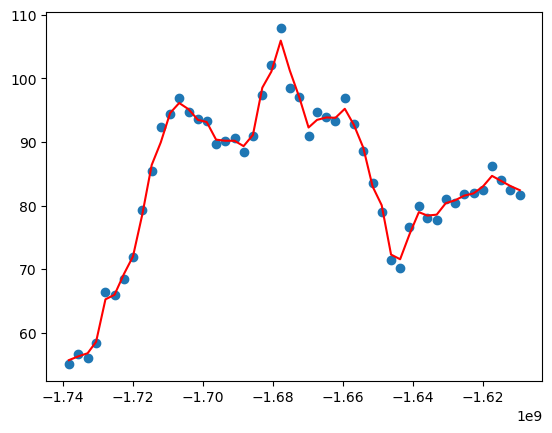

In [28]:
# define classifier  
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

# fit 
clf.fit(X, y)
pred = clf.predict(X)

# plot subset 
plt.plot(X[:50], y[:50], 'o')
plt.plot(X[:50], pred[:50], '-r')

## Stacking up some regression problems

The diabetes dataset available in sk-learn contains 10 baseline variables from 442 diabetes patients (features) and a quantitative measure of disease progression after one year after baseline (include weblink). We can apply ensemble methods for regression problems.   

In [143]:
from sklearn.datasets import load_diabetes

print(load_diabetes())

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [144]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (353, 10)
test size: (89, 10)


In [145]:
# define classifier  
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

clf.score(X_test, y_test)

0.5260997590686997

Text(0.5, 1.0, 'Regressor predictions')

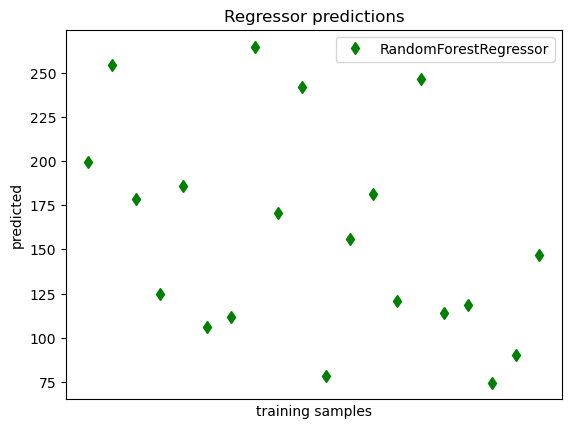

In [146]:
plt.figure()

plt.plot(pred[:20], "gd", label="RandomForestRegressor") # plot first 20 predictions to make figure clearer.

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions")

We can also take this one step further. In the same way the a RandomForest estimator uses the average of a series of trees to generate a results, we can combine the results from a series of different estimators. This is done using whats called an ensemble meta-estimator called VotingRegressor. We'll apply a Voting regressor to a random forest, gradient boosting and linear regressor. VotingRegressor can fit several base estimators, on the whole dataset, then will take the average of the individual predictions to form a final prediction. 

In [147]:
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.linear_model import LinearRegression

# instantiate estimators 
rf_reg = RandomForestRegressor(random_state=5)
gb_reg = GradientBoostingRegressor(random_state=5)
linear_reg = LinearRegression()

# fit estimators
rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)

voting_reg = VotingRegressor([("gb", rf_reg), ("rf", gb_reg), ("lr", linear_reg)])
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', RandomForestRegressor(random_state=5)),
                            ('rf', GradientBoostingRegressor(random_state=5)),
                            ('lr', LinearRegression())])

In [148]:
# make predictions
X_test_20 = X_test[:20] # first 20 for visualisation

rf_pred = rf_reg.predict(X_test_20)
gb_pred = gb_reg.predict(X_test_20)
linear_pred = linear_reg.predict(X_test_20)
voting_pred = voting_reg.predict(X_test_20)

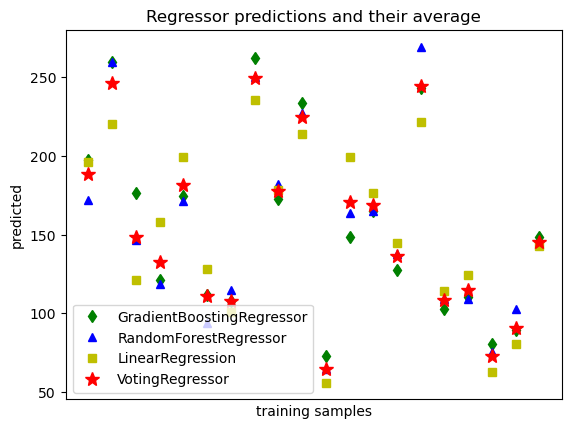

In [149]:
plt.figure()
plt.plot(rf_pred, "gd", label="GradientBoostingRegressor")
plt.plot(gb_pred, "b^", label="RandomForestRegressor")
plt.plot(linear_pred, "ys", label="LinearRegression")
plt.plot(voting_pred, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()


In [150]:
print(f'random forest: {rf_reg.score(X_test, y_test)}')

print(f'gradient boost: {gb_reg.score(X_test, y_test)}')

print(f'linear regression: {linear_reg.score(X_test, y_test)}')

print(f'voting regressor: {voting_reg.score(X_test, y_test)}')

random forest: 0.526627803806025
gradient boost: 0.5290702255768158
linear regression: 0.5271558947230808
voting regressor: 0.5520305568906223


When both the random forest regressor and voting regressor (average of all 3 estimators combined) are validated against the test data, we notice an increase in accuracy, albeit a slight one! 

## Exercise 


Sci-kit learn also has method for stacking ensemble classifiers ```sklearn.ensemble.VotingClassifier``` do you think you could apply a stack to the penguins dataset using a random forest, SVM and decision tree classifier, or a selection of any other classifier estimators available in sci-kit learn? 

In [151]:
penguins = sns.load_dataset('penguins')

feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins.dropna(subset=feature_names, inplace=True)

species_names = penguins['species'].unique()

# Define data and targets
X = penguins[feature_names]

y = penguins.species

# Split data in training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (273, 4)
test size: (69, 4)


In [152]:
# import classifiers 

# instantiate classifiers 

# fit classifiers

# instantiate voting classifier and fit data

# make predictions

# compare scores